# Wine Quality exploration and classification

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Important-libraries-and-importing-the-data" data-toc-modified-id="Important-libraries-and-importing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Important libraries and importing the data</a></span></li><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Classification" data-toc-modified-id="Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Classical-Approaches" data-toc-modified-id="Classical-Approaches-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Classical Approaches</a></span></li><li><span><a href="#ANN" data-toc-modified-id="ANN-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ANN</a></span></li></ul></li></ul></div>

## Important libraries and importing the data

For this analysis, the wine quality dataset will be used from https://archive.ics.uci.edu/ml/datasets/Wine+Quality. The dataset and needed libraries are given below.

In [1]:
# libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
# import pingouin as pg
import statsmodels.api as sm
import matplotlib as mpl
from scipy import stats
# import scikit_posthocs as sp
import datetime as dt
pd.options.display.float_format = '{:.2f}'.format
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve

from yellowbrick.classifier import ROCAUC
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

from yellowbrick.classifier import ClassPredictionError

import keras
import tensorflow

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
# importing data

red = pd.read_csv("C:/Users/admin/Desktop/projects2/Python-wine/winequality-red.csv", sep=";")
white = pd.read_csv("C:/Users/admin/Desktop/projects2/Python-wine/winequality-white.csv", sep=";")

#red = pd.read_csv("/home/evida-monika/wine/winequality-red.csv", sep=";")
#white = pd.read_csv("/home/evida-monika/wine/winequality-white.csv", sep=";")

Now, we will add the "labels" if the wine is white or red, because we will merge it later.

In [3]:
red['type'] = 'RED'
white['type'] = 'WHITE'

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,RED
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,5,RED
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,5,RED
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,6,RED
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,5,RED


In [5]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6,WHITE
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6,WHITE
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6,WHITE
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,WHITE
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6,WHITE


In [6]:
df = pd.concat([red, white])

## Data Description

The goal here is to predict wine quality based on physicochemical tests. All of the variables are:

* fixed acidity - numeric
* volatile acidity - numeric
* citric acid - numeric
* residual sugar - numeric
* chlorides - numeric
* free sulfur dioxide - numeric
* total sulfur dioxide - numeric
* density - numeric
* pH - numeric
* sulphates - numeric
* alcohol - numeric
* quality - categorical (score between 0 - 10)
* type - categorical (2 categories - white/red, added column).

As we can see, most of the data is numerical. 
We will split the quality into 3 categories. 

In [7]:
pd.DataFrame(df['quality']).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
quality,6497.00,5.82,0.87,3.00,5.00,6.00,6.00,9.00


From what we can see, median is 6, 1st quartile is 5 and 3rd quartile is also 6. So, we will split the quality into 3 groups:
* *Poor* - quality is lower than 5,
* *Mediocre* - quality is between 5 and 6,
* *Good* - quality is higher than 6.

In [8]:
df['quality_split'] = np.where(df['quality'] < 5, 
                               'Poor',
                               np.where(df['quality'] > 6, 'Good', 'Mediocre'))

df.drop(['quality'], axis = 1, inplace = True)

df['quality_split'] = df['quality_split'].astype('category')
df['type'] = df['type'].astype('category')

Below there is a summary of of all of the variables in the dataset.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.00,7.22,1.30,3.80,6.40,7.00,7.70,15.90
volatile acidity,6497.00,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric acid,6497.00,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual sugar,6497.00,5.44,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6497.00,0.06,0.04,0.01,0.04,0.05,0.07,0.61
free sulfur dioxide,6497.00,30.53,17.75,1.00,17.00,29.00,41.00,289.00
total sulfur dioxide,6497.00,115.74,56.52,6.00,77.00,118.00,156.00,440.00
density,6497.00,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,6497.00,3.22,0.16,2.72,3.11,3.21,3.32,4.01
sulphates,6497.00,0.53,0.15,0.22,0.43,0.51,0.60,2.00


We can see that there are 6497 observations in every variable. Just to be sure, we will also check the number of NULL values.

In [10]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality_split           0
dtype: int64

Below there are information about type of every variable and number of non null values.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  type                  6497 non-null   category
 12  quality_split         6497 non-null   category
dtypes: category(2), float64(11)
memory usage: 622.0 KB


Below there are numbers of unique values for every variable in a dataset.

In [12]:
df.nunique()

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
type                      2
quality_split             3
dtype: int64

## Data Exploration

At the first glance, all of the variables will be taken into consideration in analysis and predictions. The target variable will be **quality_split**.

Categorical variables will be shown by barplots and continuous variables will be shown by histograms.

In [13]:
def barplots(data, cols):
    
    length = len(cols)
    top = math.ceil(length/2)
    plt.figure(figsize = (12,5))
    
    for i in range(length):
        
        plt.subplot(top, 2, i+1)
        sns.countplot(data = data, x = cols[i])
        plt.xlabel("{}".format(cols[i]))
        plt.ylabel("Count")
        plt.tight_layout()
    
    plt.show()
    return plt

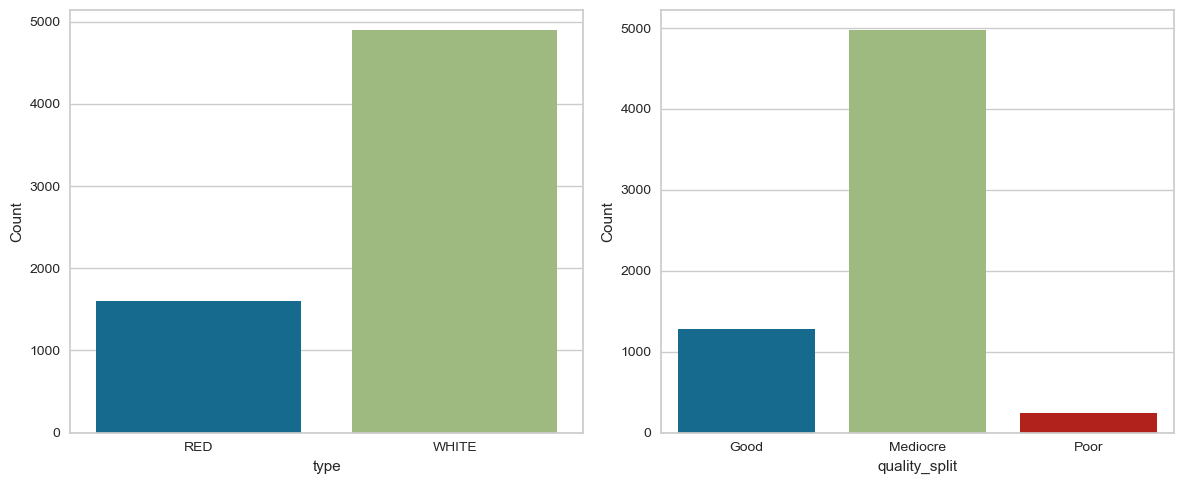

<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\anaconda\\envs\\wine\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [14]:
barplots(df, ['type', 'quality_split'])

As we can see the categorical data is very imbalanced. 

Below there are histograms for numerical data. 

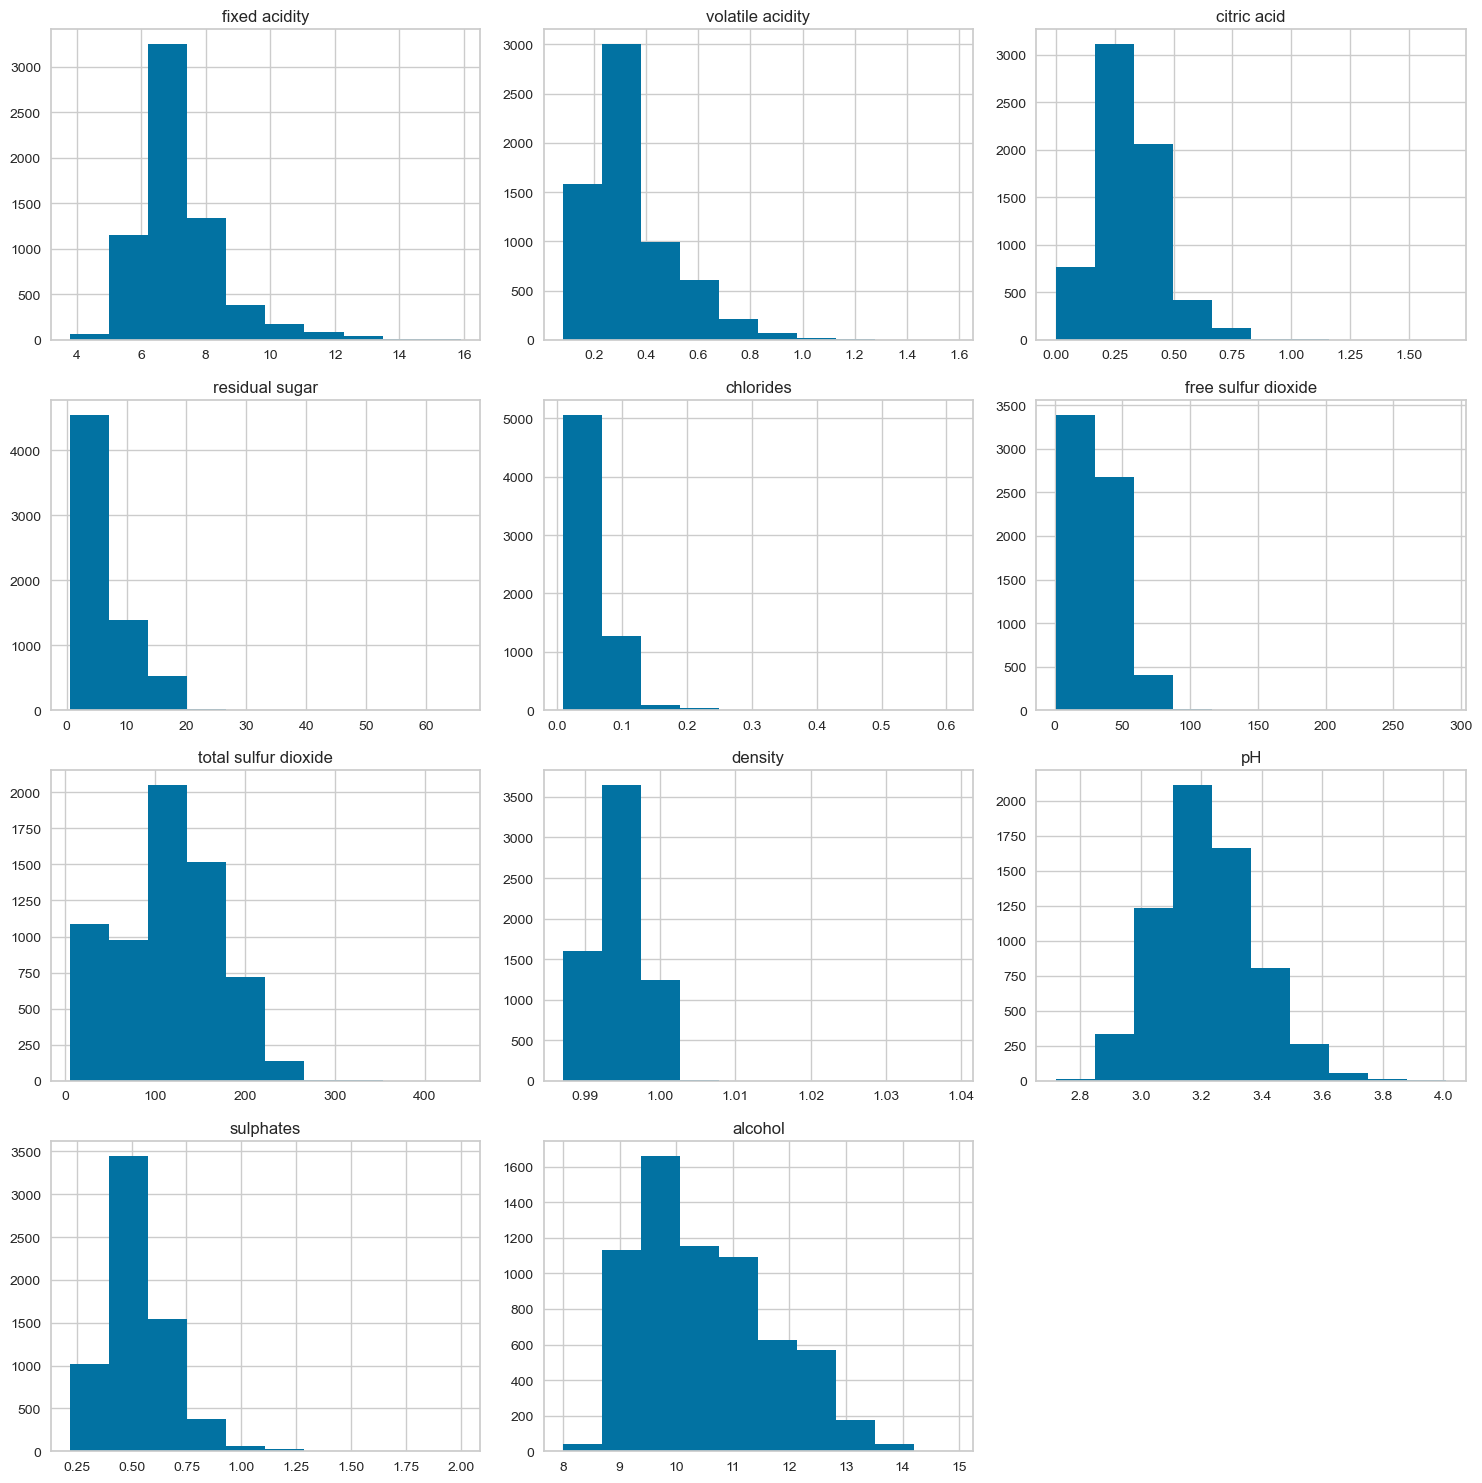

In [15]:
df.hist(figsize = (15,15))
plt.tight_layout()

There are a lot of outliers in the dataset. To prevent the data loss, we will replace the outliers. 

* For fixed acidity

In [16]:
pd.DataFrame(df['fixed acidity'][df['fixed acidity']<13].sort_values(ascending=False)).reset_index().head()

,index,fixed acidity
0,811,12.90
1,538,12.90
2,206,12.80
3,205,12.80
4,366,12.80


The closest value to 13 is 12.9, so we will replace the outliers with this value. Below there is a code for a function that will detect the closest value to given threshold and replace the outliers above threshold with this value.

In [17]:
def replace_outliers(data, col, thresh):
    
    repl = pd.DataFrame(data[col][data[col]<thresh].sort_values(ascending=False)).reset_index().iloc[0, 1]
    
    data[col] = np.where(data[col] > thresh, repl, data[col])
    

In [18]:
replace_outliers(df, 'fixed acidity', 13)

* volatile acidity

In [19]:
replace_outliers(df, 'volatile acidity', 1.0)

* citric acid

In [20]:
replace_outliers(df, 'citric acid', 0.75)

* residual sugar

In [21]:
replace_outliers(df, 'residual sugar', 20)

* chlorides

In [22]:
replace_outliers(df, 'chlorides', 0.15)

* free sulfur dioxide

In [23]:
replace_outliers(df, 'free sulfur dioxide', 100)

* total sulfur dioxide

In [24]:
replace_outliers(df, 'total sulfur dioxide', 275)

* density

In [25]:
replace_outliers(df, 'density', 1.001)

* pH

In [26]:
replace_outliers(df, 'pH', 3.8)

* sulphates

In [27]:
replace_outliers(df, 'sulphates', 1)

* alcohol

In [28]:
replace_outliers(df, 'alcohol',14)

Now, after the replacement of outliers, we can see the histograms again. Now there should be no outliers.

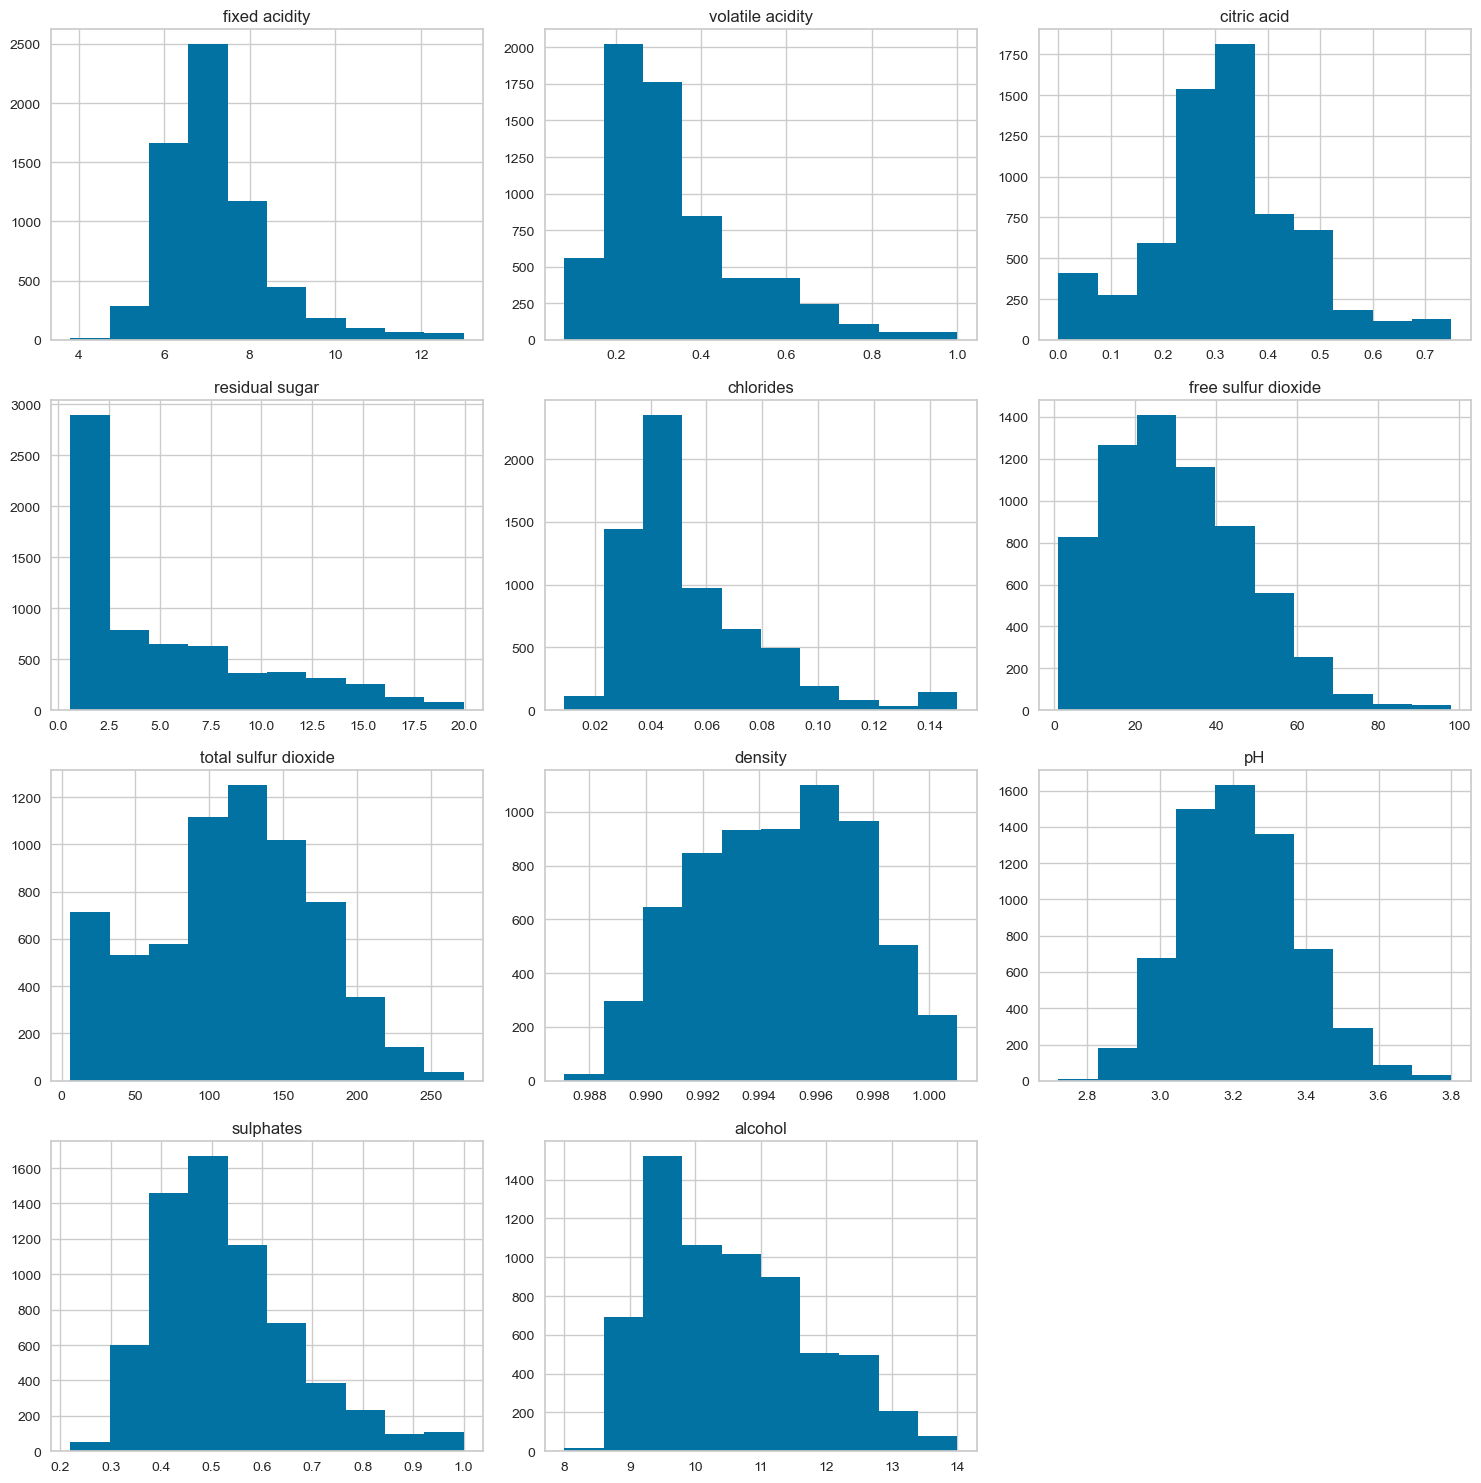

In [29]:
df.hist(figsize = (15,15))
plt.tight_layout()

Now it's time for correlation. Because we have a lot of observations, we can assume normality in the data (a little bit skewed, but normal).

In [30]:
# Correlation plots and table definition

def corr_heatmap_p(df, cor_type = ['spearman', 'pearson']):
    if cor_type == 'spearman':
        rho, p = stats.spearmanr(df)
        rho = pd.DataFrame(rho).set_index(pd.Index(df.columns))
        rho.columns = df.columns

        p = pd.DataFrame(p).set_index(pd.Index(df.columns))
        p.columns = df.columns

        plt.figure(figsize=(12,7))
        heatmap = sns.heatmap(rho, vmin=-1, 
                          vmax=1, annot=True)
        
        plt.title("Spearman Correlation")
    
    
        s = set_title = np.vectorize(lambda ax,rho2: ax.title.set_text(
                                            '$\\rho$ = ' + 
                                            "{:.2f}".format(rho2)) if ax!=None else None
                                )      

        rho2 = df.corr(method="spearman")
        
        g = sns.PairGrid(df,corner=True)
        g.map_diag(plt.hist,color="yellow")
        g.map_lower(sns.scatterplot,color="magenta")
        set_title(g.axes,rho2)
        plt.subplots_adjust(hspace = 0.6)
        plt.show()
                
        for col in rho.columns:
            rho[col] = np.where((p[col] <= 0.05) & (p[col] > 0.01) & (col != rho.index),
                                          rho[col].round(2).astype('str') + '*', 
                                          np.where((p[col] <= 0.01) & (p[col] > 0.001) & (col != rho.index),
                                          rho[col].round(2).astype('str') + '**', 
                                          np.where((p[col] <= 0.001) & (col != rho.index),
                                          rho[col].round(2).astype('str') + '***', 
                                          rho[col])))
        
        
    elif cor_type == 'pearson':
        # rho, p = stats.pearsonr(df, df)
        plt.figure(figsize=(12,7))
        heatmap = sns.heatmap(df.corr(), vmin=-1, 
                          vmax=1, annot=True)   
        df.corr(method="pearson")
        
    #return rho

In [31]:
df_numeric = df.loc[:, ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [32]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type', 'quality_split'],
      dtype='object')

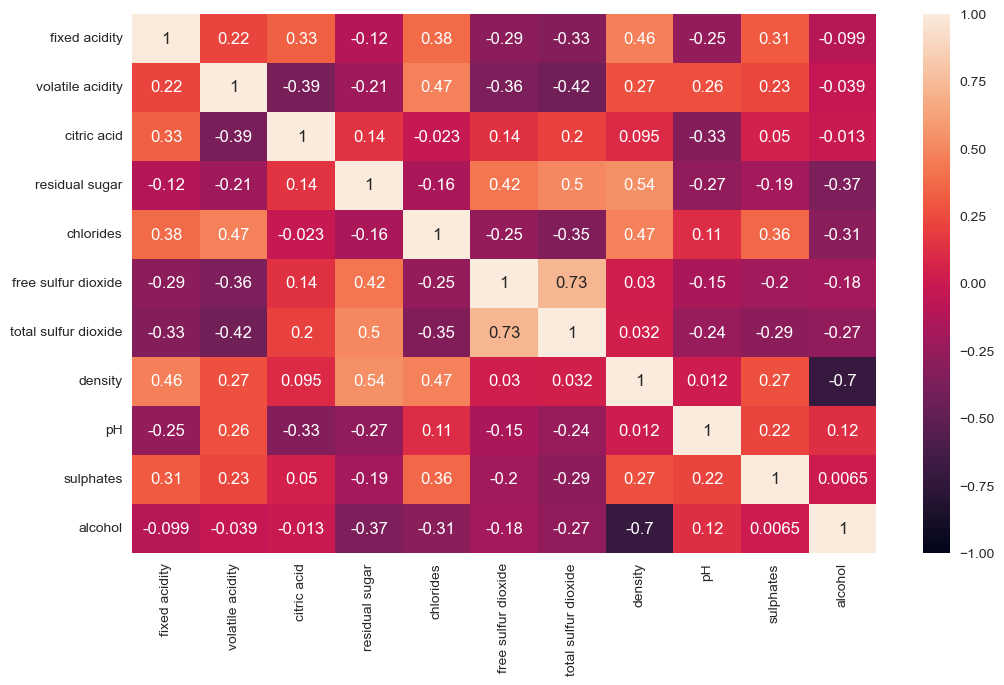

In [33]:
corr_heatmap_p(df_numeric, 'pearson')

We can see that there is strong correlation is between density and alcohol. We can also see that there is a lot of mediocre correlation (between 0.4 and 0.7).

Now we will visualize relationships between variables and target variable and select the variables taken into consideration for later classification.

In [34]:
def plots_by_target(df, target_var, cat_cols, num_cols):
    
    df2 = df.loc[:, df.columns != target_var]
    no_col = len(df2.columns)
    df_cols = df2.columns
    
    plt.figure(figsize=(20,30))
    
    no_rows_pl = math.ceil(no_col/2)
    for i in range(no_col):
        
        axi = plt.subplot(no_rows_pl, 2, i+1)
        
        if df_cols[i] in num_cols:
            sns.boxplot(data = df, y = df_cols[i], x = target_var)
            plt.title("{}\n".format(df_cols[i]), fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
        elif df_cols[i] in cat_cols:
            sns.countplot(x=target_var, hue = df_cols[i], data=df, ax = axi)
            plt.title("{}\n".format(df_cols[i]), fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
        plt.tight_layout()
    
    plt.show()

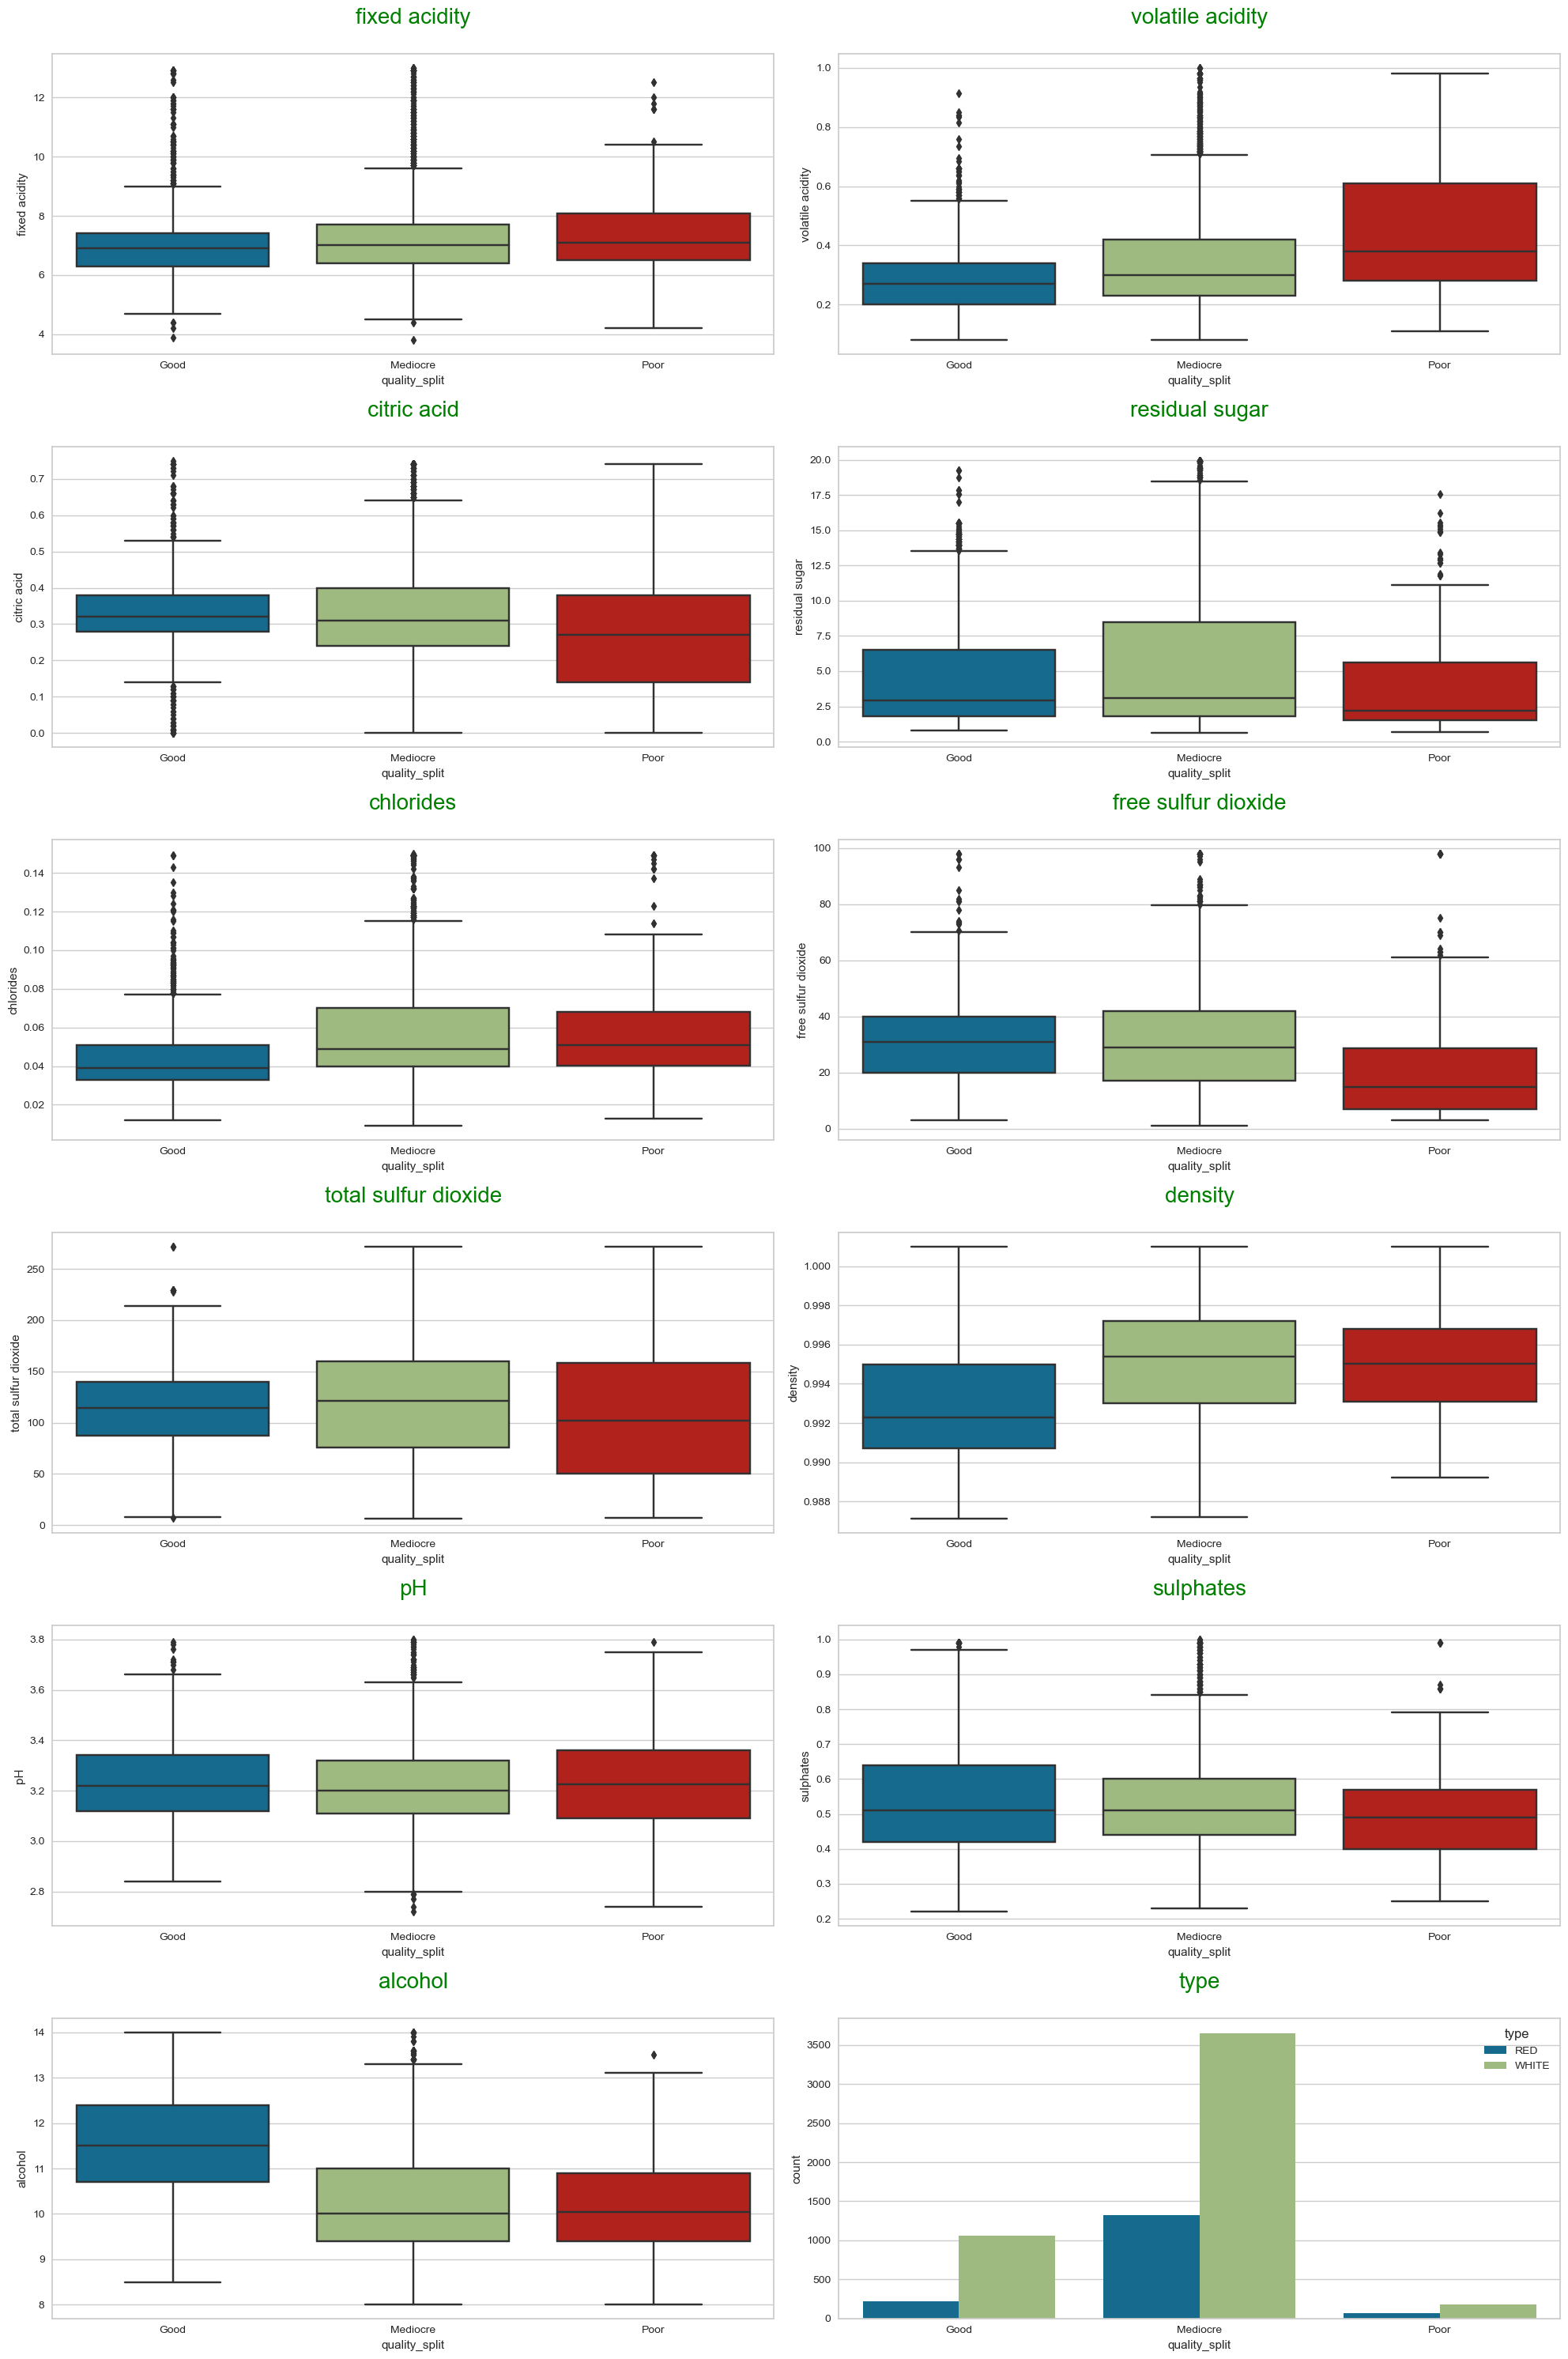

In [35]:
plots_by_target(df, target_var = 'quality_split', cat_cols = ['type'], num_cols = df_numeric.columns)

Because of the fact that if the data boxplots are similar, the same level and height, we may think about excluding some variables from the analysis (for example fixed acidity, pH), because they may not have influence on target variable. But just to be sure, we will conduct ANOVA and chi-square tests.

In [36]:
def check_relationship_anova_chi(df, target_var, cat_cols, num_cols):
    
    df2 = df.loc[:, df.columns != target_var]
    no_col = len(df2.columns)
    df_cols = df2.columns
    
    for i in range(no_col):
        
        if df_cols[i] in num_cols:
        
            if len(df[target_var].unique()) == 3:
                anova_result = f_oneway(df[df_cols[i]][df[target_var] == df[target_var].unique()[0]],
                                        df[df_cols[i]][df[target_var] == df[target_var].unique()[1]],
                                        df[df_cols[i]][df[target_var] == df[target_var].unique()[2]])
                
                if (anova_result[1] < 0.05):
                    print('[ANOVA] {} is correlated with {} with p-value: {} and statistics: {}'.format(df_cols[i], target_var, round(anova_result[1],3), round(anova_result[0], 3)))
                    
                else: 
                    print('[ANOVA] {} is NOT correlated with {} with p-value: {} and statistics: {}'.format(df_cols[i], target_var, round(anova_result[1],3), round(anova_result[0], 3)))

            elif len(df[target_var].unique()) == 2:
                anova_result = f_oneway(df[df_cols[i]][df[target_var] == df[target_var].unique()[0]],
                                        df[df_cols[i]][df[target_var] == df[target_var].unique()[1]])
                
                if (anova_result[1] < 0.05):
                    print('[ANOVA] {} is correlated with {} with p-value: {} and statistics: {}'.format(df_cols[i], target_var, round(anova_result[1],3), round(anova_result[0], 3)))
                    
                else: 
                    print('[ANOVA] {} is NOT correlated with {} with p-value: {} and statistics: {}'.format(df_cols[i], target_var, round(anova_result[1],3), round(anova_result[0], 3)))

            
        elif df_cols[i] in cat_cols:
            
            cross_tab = pd.crosstab(index=df[target_var], columns=df[df_cols[i]])
            chisq_result = chi2_contingency(cross_tab)
            
            if (chisq_result[1] < 0.05):
                print('[CHI-SQUARE] {} is correlated with {} with p-value: {} and statistics: {}'.format(df_cols[i], target_var, round(chisq_result[1],3), round(chisq_result[0], 3)))
                    
            else: 
                print('[CHI-SQUARE] {} is NOT correlated with {} with p-value: {} and statistics: {}'.format(df_cols[i], target_var, round(chisq_result[1],3), round(chisq_result[0], 3)))

        

In [37]:
check_relationship_anova_chi(df, target_var = 'quality_split', cat_cols = ['type'], num_cols = df_numeric.columns)

[ANOVA] fixed acidity is correlated with quality_split with p-value: 0.0 and statistics: 9.476
[ANOVA] volatile acidity is correlated with quality_split with p-value: 0.0 and statistics: 137.591
[ANOVA] citric acid is correlated with quality_split with p-value: 0.0 and statistics: 22.333
[ANOVA] residual sugar is correlated with quality_split with p-value: 0.0 and statistics: 23.315
[ANOVA] chlorides is correlated with quality_split with p-value: 0.0 and statistics: 135.391
[ANOVA] free sulfur dioxide is correlated with quality_split with p-value: 0.0 and statistics: 35.068
[ANOVA] total sulfur dioxide is correlated with quality_split with p-value: 0.0 and statistics: 14.974
[ANOVA] density is correlated with quality_split with p-value: 0.0 and statistics: 278.128
[ANOVA] pH is correlated with quality_split with p-value: 0.013 and statistics: 4.317
[ANOVA] sulphates is correlated with quality_split with p-value: 0.0 and statistics: 9.954
[ANOVA] alcohol is correlated with quality_split

The tests say that we should keep all of the variables for later classification.

## Classification

Before we proceed with classification, we will convert categorical data into numbers (*quality_split* - ordinal data and *type* - numeric as 0/1).

In [38]:
df['type'].replace({'RED': 0, 'WHITE': 1}, inplace = True)

In [39]:
target = df.loc[:, ['quality_split']]
predictors = df.drop(['quality_split'], axis = 1)

In [40]:
target['quality_split'].replace({'Mediocre': 1, 'Good': 0, 'Poor': 2}, inplace = True)

In [41]:
# here, we will change data frame with target to array

target_array = np.array(target['quality_split'])

In [42]:
predictors.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,0
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,0


### Classical Approaches

We don't have any more categorical variables, so we will proceed. Below there is a code to split data into train and test set, find the best parameters for each model and then to evaluate the data. Because we have unbalanced data, not only accuracy, but also precision, recall, Cohen's kappa, Matthews Correlation Coefficient (MCC) and ROC Curves with AUC will be shown. Also prediction error plot for each model will be shown. Values the closer to 1, the better.
What does some of the indexes mean?
* **Precision** - percent of diagnosed positive cases, it can be done in 3 ways:
    - *micro* - calculate metrics globally by counting the total true positives, false negatives and false positives,
    - *macro* - calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account,
    - *weighted* - calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters *macro* to account for label imbalance; it can result in an F-score that is not between precision and recall,
* **Recall** - intuitively the ability of the classifier to find all the positive samples (in percent), again it comes in 3 versions (the explanations are the same as above),
    - *micro*,
    - *macro*,
    - *weighted*,
* **Cohen's Kappa** - a measure of compliance with a random classifier. Takes values in the range -1 to +1.  A value of 0 means a random classifier. Positive values means that the classifier is better than random,
* **Matthews correlation coefficient** (MCC) - the correlation coefficient between the observed and predicted classifications. A coefficient of +1 represents a perfect prediction, 0 is similar to a random prediction and -1 indicates an inverse prediction,
* **ROC Curve** (Receiver Operating Characteristic) - shows the true positive and false positive rate for every probability threshold of a classifier, The ROC curve is often used as a tool for evaluating and comparing models with each other classification,
* **AUC** (Area Under Curve) - it is Area Under ROC Curve, evaluates the overall quality of a model, takes values from the interval [0, 1] and the larger it is, the better the model.

In the function, we will normalize data and use GridSearchCV function to find the best parameters. The algorithms considered now will be:
* Stochastic Gradient Descent (SGD)
* Logistic Regression
* Decision Trees
* Random Forest
* AdaBoost (with DecisionTreeClassifier as base estimator)
* GradientBoost (with DecisionTreeClassifier as base estimator).

In [43]:
# Function to find the best parameters

def train(X, y, grid_params):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X) # scaling data with standard scaler

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                      test_size=0.3, 
                                                      random_state=42, # we set it to always have the same results with split
                                                      stratify=y) # we take 70% of the data as training, 30% as testing

    X_test_inv = scaler.inverse_transform(X_test) # inverse scaling, if we wanted to use original data

    # dictionary with models that calls them
    
    models = {
        "SGD": SGDClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(), 
        "AdaBoost": AdaBoostClassifier(), 
        "GradientBoost": GradientBoostingClassifier()
    } 

    # store best estimators
    best_estimators = dict.fromkeys(models.keys())

    for model_name in models:
        base_clf = models[model_name]
        params = grid_params[model_name]

        print("[INFO] Performing Grid-Search CV ---- {}".format(model_name))
        model = GridSearchCV(base_clf, params, scoring='balanced_accuracy', cv=5, n_jobs=-1, 
                             verbose=0) # we perform GridSearchCV for every model
  
        model.fit(X_train, y_train) # we fit the data
        best_estimators[model_name] = model.best_estimator_ # add the best estimators for each momdel
        
        print("[{}] Best parameters are {}".format(model_name, model.best_params_)) # we fit the best parameters for every model

    return best_estimators, X_test, y_test, X_train, y_train, X_test_inv

# Below there is a function to evaluate the function on test data

def evaluate_classification(models, X_test, y_test):
    
    results = pd.DataFrame(columns=["Overall Accuracy", "Balanced Accuracy", "Precision micro", 
                                    "Precision macro", "Precision weighted",
                                    "Recall micro", "Recall macro", 
                                    "Recall weighted", "Cohen's kappa",
                                    "Mathews Correlation Coefficient"], index=models.keys())

    for model_name, model in models.items():
        n_samples = len(y_test)
        y_pred = model.predict(X_test)

        overall_accuracy = accuracy_score(y_test, y_pred)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        precision_micro = precision_score(y_test, y_pred, average = 'micro', zero_division = 0) 
        precision_macro = precision_score(y_test, y_pred, average = 'macro', zero_division = 0)
        precision_weighted = precision_score(y_test, y_pred, average = 'weighted', zero_division = 0)
        recall_micro = recall_score(y_test, y_pred, average='micro')
        recall_macro = recall_score(y_test, y_pred, average='macro')
        recall_weighted = recall_score(y_test, y_pred, average='weighted')
        #f1 = f1_score(y_test, y_pred)
        cohen = cohen_kappa_score(y_test, y_pred)
        matthew = matthews_corrcoef(y_test, y_pred)

        results.loc[model_name, :] = overall_accuracy, balanced_accuracy, precision_micro, precision_macro,precision_weighted, recall_micro, recall_macro, recall_weighted, cohen, matthew

    return results

# Function to draw ROC curves and calculate AUC values for every class

def ROC_curves(models, X_train, y_train, X_test, y_test, labels, name = ['SGD', 'Logistic Regression',
                                                                 'Decision Tree', 'Random Forest',
                                                                 'AdaBoost', 'GradientBoost', 
                                                                 'all']):
    
    if name != 'all':
        visualizer = ROCAUC(models.get(name), classes=labels, micro = False, macro = False)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
    
    elif name == 'all':
        
        plt.figure(figsize=(10,10))
    
        for i, (model_name, model) in enumerate(models.items(),1):
            
            axi = plt.subplot(3,2,i)

            visualizer = ROCAUC(model, classes=labels, ax = axi, micro = False, macro = False)
            visualizer.fit(X_train, y_train)
            visualizer.score(X_test, y_test)
            plt.legend()
            plt.title(model_name)
            plt.suptitle("ROC Curves for")
            plt.tight_layout()
        
    return visualizer.show()

# Function to plot prediction error plot

def prediction_error_plot(model, X_train, y_train, X_test, y_test, labels, name = ['SGD', 'Logistic Regression',
                                                                         'Decision Tree', 
                                                                         'Random Forest','AdaBoost', 
                                                                         'GradientBoost', 'all']):
    if (name == 'SGD') | (name == 'Linear Regression') | (name == 'Lasso') | (name == 'Ridge') | (name == 'Decision Tree') | (name == 'Random Forest') | (name == 'AdaBoost') | (name == 'GradientBoost'):
        clf = model.get(name)

        visualizer = ClassPredictionError(clf, classes = labels) 
        visualizer.fit(X_train, y_train) 
        visualizer.score(X_test, y_test)
    
    elif name == 'all':
        
        plt.figure(figsize=(12,12))
    
        for i, (model_name, model) in enumerate(model.items(),1):
            
            axi = plt.subplot(4,2,i)

            visualizer = ClassPredictionError(model, ax = axi, classes = labels)
            visualizer.fit(X_train, y_train)
            visualizer.score(X_test, y_test)
            #plt.legend()
            plt.title(model_name)
            plt.suptitle("Class Prediction Error for")
            plt.tight_layout()
    
    return visualizer.show()

Now, after all of the function defined, we can set parameters from which the model will search for the best parameters.

In [44]:
# parameters

grid_params = {
    "SGD": {
        "penalty": ["l1", "l2", "elasticnet"],
        "alpha": np.linspace(1e-5, 1e-3, 5),
        "learning_rate": ["optimal", "invscaling", "adaptive"],
        "eta0": np.linspace(1e-4, 1e-1, 5)
    },
    "Logistic Regression": {
        "penalty": ["l1", "l2"],
        "C": [1, 2, 4, 5],
        "solver": ["liblinear"]
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": np.linspace(3, 12, 4, dtype=np.int64)
    },
    "Random Forest": {    
        "criterion": ["gini", "entropy"],
        "max_depth": np.linspace(3, 12, 4, dtype=np.int64),
        "min_samples_split": np.linspace(0.1, 0.5, 6),
        "min_samples_leaf": np.linspace(0.1, 0.5, 6),
        "max_features":["log2","sqrt"]
    }, 
    "AdaBoost": {
        "base_estimator": [DecisionTreeClassifier(max_depth=1),
                           DecisionTreeClassifier(max_depth=2),
                           DecisionTreeClassifier(max_depth=3),
                           DecisionTreeClassifier(max_depth=4),
                           DecisionTreeClassifier(max_depth=5)],
        "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1],
        "n_estimators": np.linspace(20, 80, 4, dtype=np.int64)
    },
    "GradientBoost": {    
        "loss":["deviance"],
        "learning_rate": [0.01, 0.025, 0.05, 0.075],
        "min_samples_split": np.linspace(0.1, 0.5, 5),
        "min_samples_leaf": np.linspace(0.1, 0.5, 5),
        "max_depth":[3, 5, 8],
        "max_features":["log2","sqrt"],
        "criterion": ["friedman_mse"],
        "subsample":[0.5, 0.618, 0.85],
        "n_estimators":[5, 10, 15]
    }
} 

In [45]:
estimators, X_test, y_test, X_train, y_train, X_test_inv = train(predictors, target_array, grid_params)

[INFO] Performing Grid-Search CV ---- SGD
[SGD] Best parameters are {'alpha': 1e-05, 'eta0': 0.050050000000000004, 'learning_rate': 'optimal', 'penalty': 'l1'}
[INFO] Performing Grid-Search CV ---- Logistic Regression
[Logistic Regression] Best parameters are {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}
[INFO] Performing Grid-Search CV ---- Decision Tree
[Decision Tree] Best parameters are {'criterion': 'gini', 'max_depth': 12}
[INFO] Performing Grid-Search CV ---- Random Forest
[Random Forest] Best parameters are {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
[INFO] Performing Grid-Search CV ---- AdaBoost


C:\Users\admin\anaconda\envs\wine\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[AdaBoost] Best parameters are {'base_estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 0.01, 'n_estimators': 20}
[INFO] Performing Grid-Search CV ---- GradientBoost
[GradientBoost] Best parameters are {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 5, 'subsample': 0.5}


C:\Users\admin\anaconda\envs\wine\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [46]:
evaluation_table = evaluate_classification(estimators, X_test, y_test)

In [47]:
evaluation_table

,Overall Accuracy,Balanced Accuracy,Precision micro,Precision macro,Precision weighted,Recall micro,Recall macro,Recall weighted,Cohen's kappa,Mathews Correlation Coefficient
SGD,0.75,0.42,0.75,0.42,0.71,0.75,0.42,0.75,0.24,0.25
Logistic Regression,0.78,0.41,0.78,0.46,0.73,0.78,0.41,0.78,0.24,0.27
Decision Tree,0.80,0.55,0.80,0.59,0.79,0.80,0.55,0.80,0.44,0.44
Random Forest,0.77,0.33,0.77,0.26,0.59,0.77,0.33,0.77,0.00,0.00
AdaBoost,0.80,0.44,0.80,0.63,0.77,0.80,0.44,0.80,0.29,0.33
GradientBoost,0.77,0.33,0.77,0.26,0.59,0.77,0.33,0.77,0.00,0.00


The best model (by majority rule) is Decision Tree with max depth equal to 12. It has overall accuracy equal to 80%, but the data is unbalanced, so the balanced accuracy should be better in this case and it is 56%, so it is not a good score. Let's dive also into other indexes. Micro and weighted precision are respectively 0.8 and 0.79, so for unbalanced data they are the proper values, and a good ones. Micro and weighted recall are both 0.8, so again, it is also a good score. Cohen's kappa and MCC are the best of all - 0.44, so not so bad and not perfect. On the other hand, AdaBoost and Logistic Regression have better AUC values for each group. 

Below there are ROC Curves and prediction error plots.

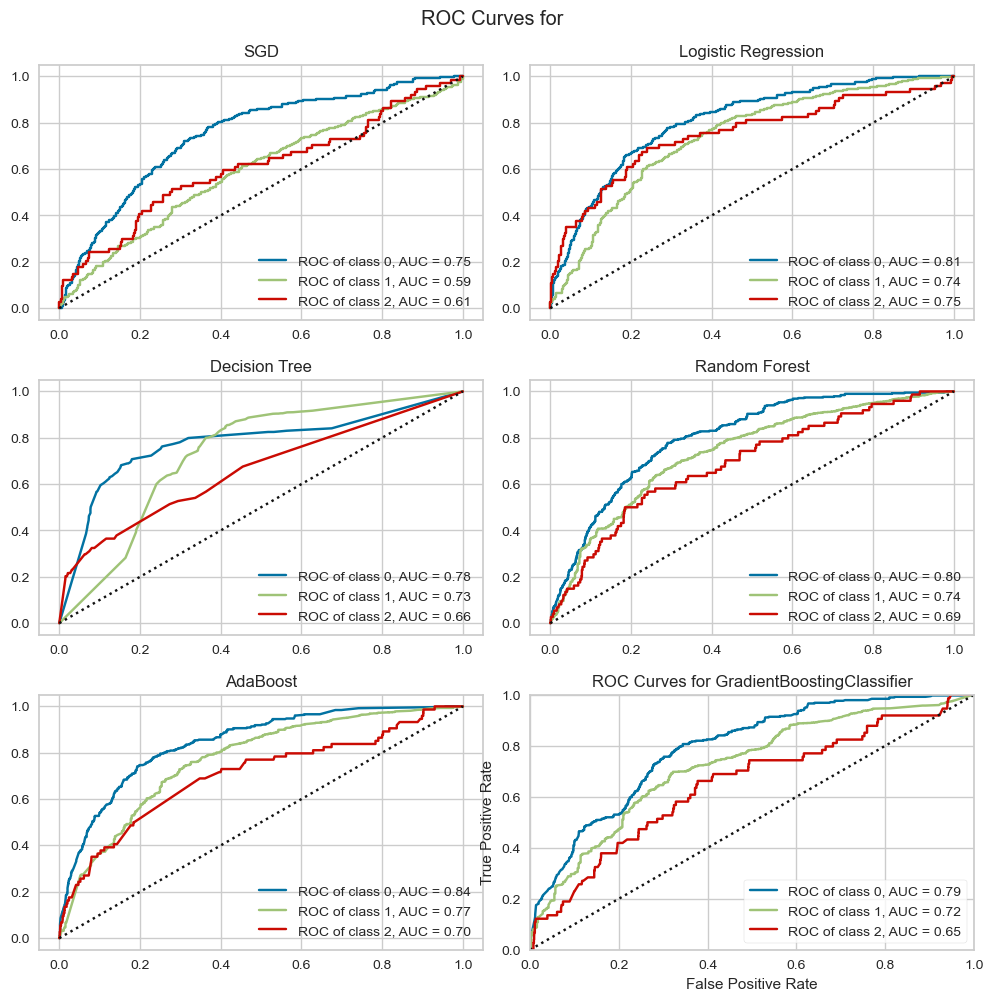

<Axes: title={'center': 'ROC Curves for GradientBoostingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
ROC_curves(estimators, X_train, y_train, X_test, y_test, np.unique(target), name = 'all')

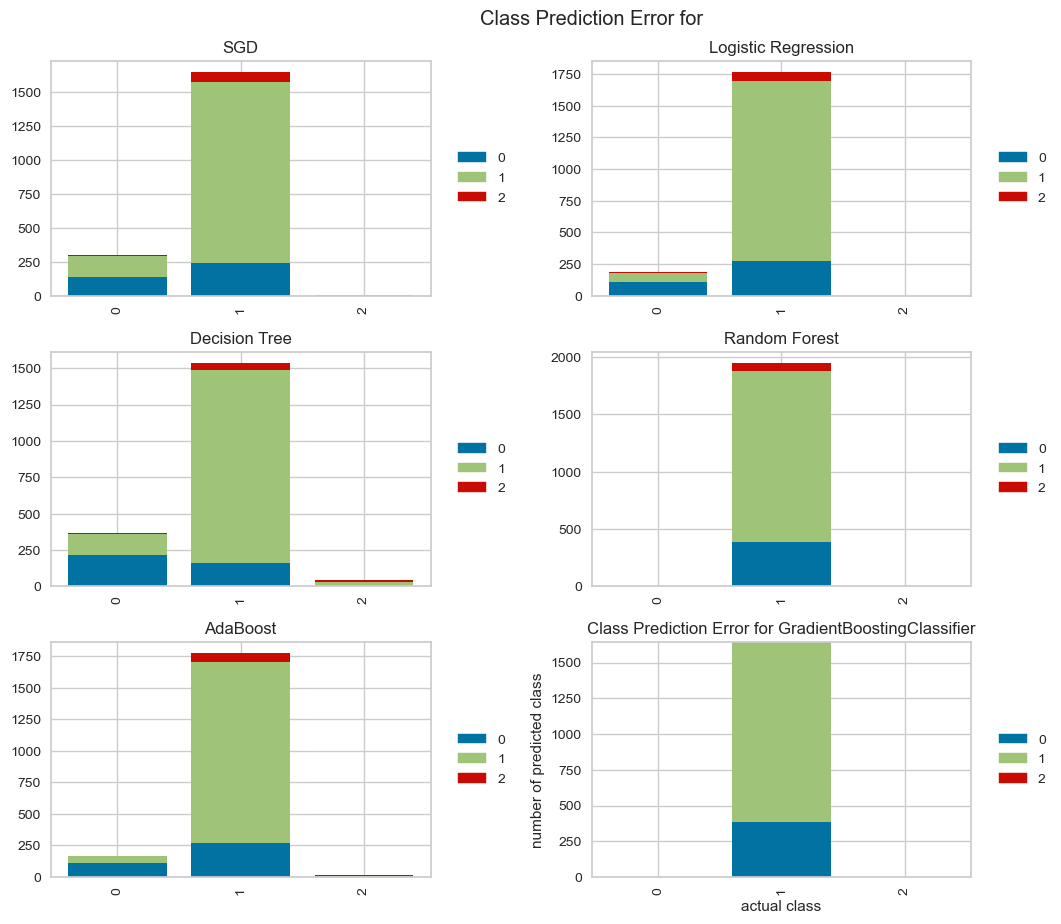

<Axes: title={'center': 'Class Prediction Error for GradientBoostingClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [49]:
prediction_error_plot(estimators, X_train, y_train, X_test, y_test, np.unique(target), 'all')

In prediction error plots, on the x-axis we have given predictions, and by colors are given true classes.
From those plots, we can see that only Decision Tree classified data to the label number 2, so the Decision Tree is the best one. Overall, The models do not classify the data well.

Now, we'll try to do some neural networks, maybe they are going to turn out better than classical approaches.

### ANN

First, we need to do one hot encoding for target variable.

In [50]:
target_one_hot = pd.get_dummies(target)

Now, we scale the data and split it into train and test sets.

In [51]:
sc = StandardScaler()
predictors_scaled = pd.DataFrame(sc.fit_transform(predictors))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(predictors_scaled, target_one_hot, test_size = 0.3, random_state = 42)

Now, we will build simple neural network with 2 hidden layers with 15 nodes (number of input number of predictors plus number of output) and 8 nodes (as 2/3 of input layer), then we add the output layer with 3 nodes, because we have 3 classes. For this approach we used 2 methods of thumb (https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3).

In [53]:
ann = Sequential()
ann.add(Dense(units = 15, input_dim = len(X_train.columns), activation = 'relu')) # input and first hidden layer
ann.add(Dense(units = 8, activation = 'relu')) # second hidden layer
ann.add(Dense(units = 3, activation = 'softmax')) # output
ann.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [54]:
ann.fit(X_train, y_train, batch_size = 15, epochs = 20, verbose = 1)

Epoch 1/20
304/304 [==============================] - 3s 4ms/step - loss: 0.6982 - accuracy: 0.7603
Epoch 2/20
304/304 [==============================] - 1s 4ms/step - loss: 0.5948 - accuracy: 0.7669
Epoch 3/20
304/304 [==============================] - 1s 4ms/step - loss: 0.5690 - accuracy: 0.7790
Epoch 4/20
304/304 [==============================] - 1s 4ms/step - loss: 0.5501 - accuracy: 0.7867
Epoch 5/20
304/304 [==============================] - 1s 4ms/step - loss: 0.5343 - accuracy: 0.7906
Epoch 6/20
304/304 [==============================] - 1s 4ms/step - loss: 0.5241 - accuracy: 0.7900
Epoch 7/20
304/304 [==============================] - 1s 4ms/step - loss: 0.5161 - accuracy: 0.7935
Epoch 8/20
304/304 [==============================] - 1s 4ms/step - loss: 0.5100 - accuracy: 0.7924
Epoch 9/20
304/304 [==============================] - 1s 4ms/step - loss: 0.5058 - accuracy: 0.7935
Epoch 10/20
304/304 [==============================] - 1s 4ms/step - loss: 0.5032 - accuracy: 0.7922

In [55]:
ann.evaluate(X_test, y_test, verbose = 1, batch_size = 15)

130/130 [==============================] - 1s 4ms/step - loss: 0.4907 - accuracy: 0.7938


[0.49069449305534363, 0.7938461303710938]

As we can see, on training data the accuracy is 80%, and on test data it is also approximately 80%. Now let's see other values for classification. First, we need to find the predictions from the probabilities. If the probability of one class is bigger than 0.5, then this class is predicted one.

In [56]:
y_pred_class = (ann.predict(X_test) > 0.5).astype('int32')

61/61 [==============================] - 1s 3ms/step


In [57]:
y_test = pd.DataFrame(y_test)
y_test['observed'] = np.where(y_test.iloc[:,0] == 1,
                                   0,
                                   np.where(y_test.iloc[:,1] == 1, 
                                            1, 
                                            2))
y_test = y_test.loc[:, ['observed']]

In [58]:
y_pred_class = pd.DataFrame(y_pred_class)
y_pred_class['predicted'] = np.where(y_pred_class[0] == 1,
                                   0,
                                   np.where(y_pred_class[1] == 1, 
                                            1, 
                                            2))

y_pred_class = y_pred_class.loc[:, ['predicted']]

Below there is a confusion matrix and classification report.

In [59]:
pd.DataFrame(confusion_matrix(y_test, y_pred_class, labels = [0,1,2]))

,0,1,2
0,123,237,5
1,81,1416,10
2,0,76,2


In [60]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.60      0.34      0.43       365
           1       0.82      0.94      0.88      1507
           2       0.12      0.03      0.04        78

    accuracy                           0.79      1950
   macro avg       0.51      0.43      0.45      1950
weighted avg       0.75      0.79      0.76      1950



Out of all of the wines that the model predicted as poor (2), only 12% were actually poor quality. From the actually poor wines, the model predicted the outcome correctly for 3% of the wines. For class Good (0) and Poor (2), the f1 score shows us that the model is not too good for predicting if the wine will be good or poor. The good values are for class mediocre (1). The results like this are probably caused by data imbalance.  